In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv("BostonHousing.csv")
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


#### CRIM - уровень преступности на душу населения по городам
#### ZN - доля жилой земли, зонированной для участков более 25 000 кв. футов
#### INDUS - доля акров под нерозничный бизнес по городам
#### CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
#### NOX - концентрация оксидов азота (частей на 10 миллионов)
#### RM - среднее количество комнат на жилое помещение
#### AGE - доля занимаемых владельцами единиц, построенных до 1940 года
#### DIS - взвешенные расстояния до пяти бостонских центров занятости
#### RAD - индекс доступности радиальных автомагистралей
#### TAX - ставка налога на имущество в полной стоимости за 10 000 долларов
#### PTRATIO - соотношение учеников и учителей по городам
#### B - 1000(Bk - 0.63)^2, где Bk - доля чернокожих по городам
#### LSTAT - % населения с низким статусом
#### MEDV - Медианная стоимость домов, занимаемых владельцами, в 1000 долларов

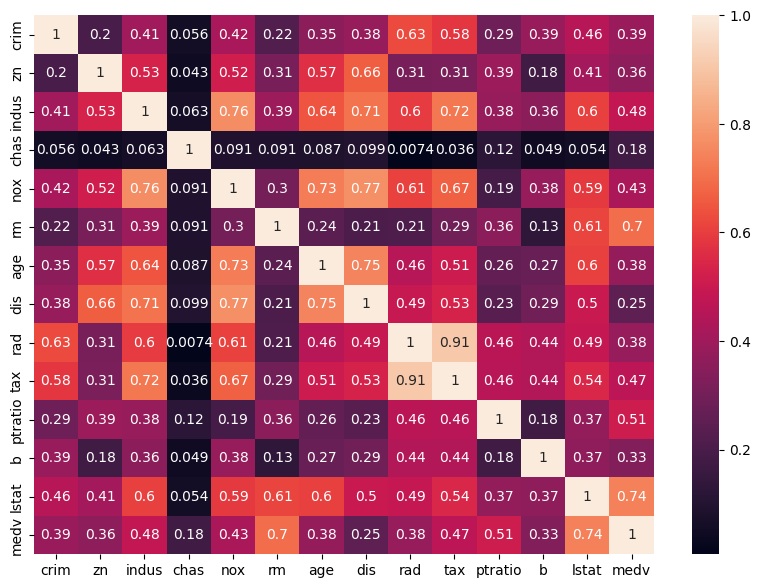

In [3]:
plt.figure(figsize=(10,7))
corr = df.corr().abs()
ax = sns.heatmap(corr, annot=True)

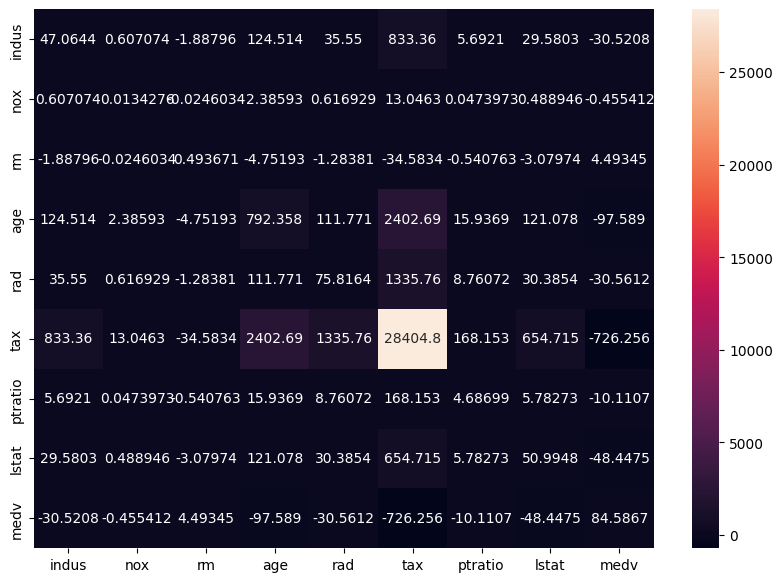

In [4]:
plt.figure(figsize=(10,7))
cols_cov_check = ['indus', 'nox', 'rm', 'age', 'rad', 'tax', 'ptratio', 'lstat', 'medv']
cols_cov = df[cols_cov_check].cov()

ax = sns.heatmap(cols_cov, annot=True, fmt='g', xticklabels=cols_cov_check, yticklabels=cols_cov_check)

# по диагонали дисперсия 
# следовательно для средней стоимости дома так как rm имеет положительное значение, то есть небольшая ковариация, то есть увеличиваются вместе 
# а например для полей tax и age ковариация уже более явная

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
df.shape

(506, 14)

In [8]:
missing_values = df.isnull().sum()
missing_values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [9]:
mean_cost_by_rm = df.groupby(['rm'])['medv'].mean()
print(f'Mean cost grouped by count of rooms: {mean_cost_by_rm.sort_values(ascending=False)}')

Mean cost grouped by count of rooms: rm
6.216    50.0
7.923    50.0
8.725    50.0
8.704    50.0
8.375    50.0
         ... 
5.414     7.0
5.852     6.3
5.987     5.6
5.453     5.0
5.683     5.0
Name: medv, Length: 446, dtype: float64


In [10]:
mean_cost = df.groupby(['rm', 'lstat'])['medv'].mean()
print(f'Mean cost:\n{mean_cost.sort_values(ascending=False)}\n')

Mean cost:
rm     lstat
6.683  3.73     50.0
7.489  1.73     50.0
7.831  4.45     50.0
7.875  2.97     50.0
7.923  3.16     50.0
                ... 
4.519  36.98     7.0
5.852  29.97     6.3
5.987  26.77     5.6
5.453  30.59     5.0
5.683  22.98     5.0
Name: medv, Length: 506, dtype: float64



C:\Users\Ксения\AppData\Local\Temp\ipykernel_19292\1800416439.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Ксения\AppData\Local\Temp\ipykernel_19292\1800416439.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Ксения\AppData\Local\Temp\ipykernel

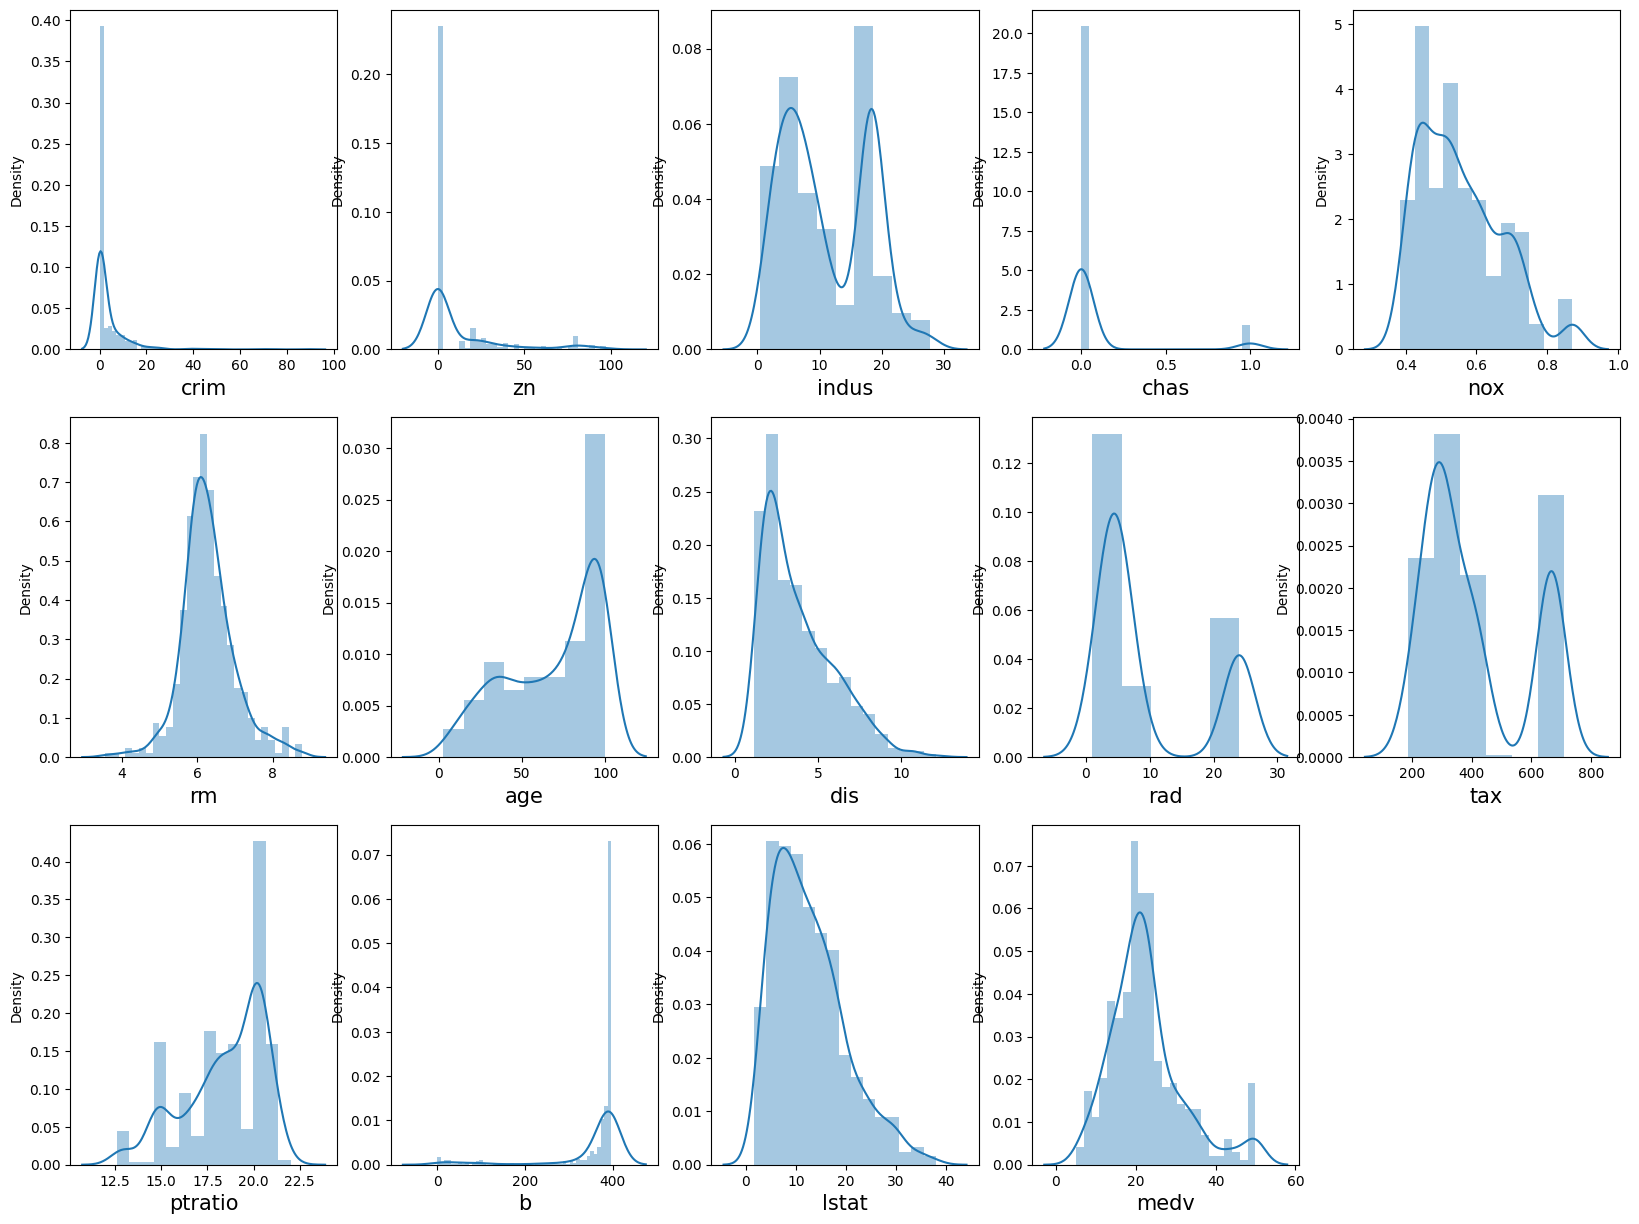

In [11]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.show()

In [12]:
minimum_price = np.min(df['medv'])
maximum_price = np.max(df['medv'])
mean_price = np.mean(df['medv'])
median_price = np.median(df['medv'])
std_price = np.std(df['medv'])


print("Statistics for Boston housing dataset:")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:
Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


In [13]:
minimum_lstat = np.min(df['lstat'])
maximum_lstat = np.max(df['lstat'])
mean_lstat = np.mean(df['lstat'])
std_lstat = np.std(df['lstat'])

# Show the calculated statistics
print("Statistics for level of poberty - Boston housing dataset:")
print("Minimum lstat: {:,.2f}".format(minimum_lstat))
print("Maximum lstat: {:,.2f}".format(maximum_lstat))
print("Mean lstat: {:,.2f}".format(mean_lstat))
print("Standard deviation of lstat: {:,.2f}".format(std_lstat))

Statistics for level of poberty - Boston housing dataset:
Minimum lstat: 1.73
Maximum lstat: 37.97
Mean lstat: 12.65
Standard deviation of lstat: 7.13


In [14]:
minimum_lstat = np.min(df['rm'])
maximum_lstat = np.max(df['rm'])
mean_lstat = np.mean(df['rm'])
std_lstat = np.std(df['rm'])

# Show the calculated statistics
print("Statistics for count of rooms - Boston housing dataset:")
print("Minimum rooms: {:,.2f}".format(minimum_lstat))
print("Maximum rooms: {:,.2f}".format(maximum_lstat))
print("Mean rooms: {:,.2f}".format(mean_lstat))
print("Standard deviation of rooms: {:,.2f}".format(std_lstat))

Statistics for count of rooms - Boston housing dataset:
Minimum rooms: 3.56
Maximum rooms: 8.78
Mean rooms: 6.28
Standard deviation of rooms: 0.70


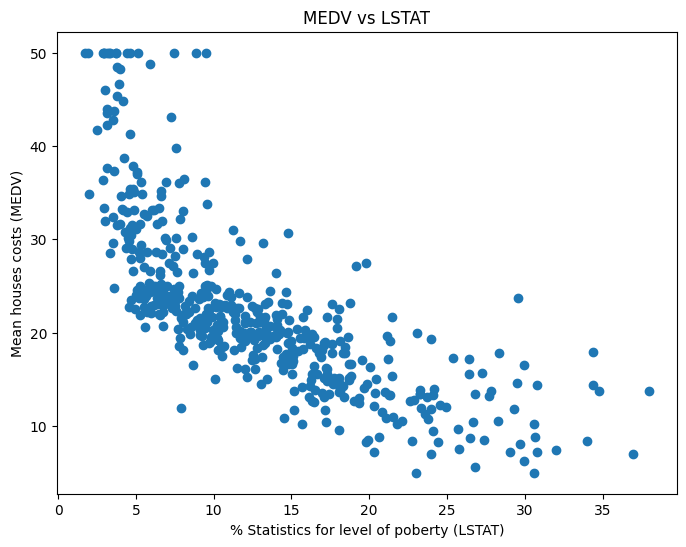

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['lstat'], df['medv'])
plt.xlabel('% Statistics for level of poberty (LSTAT)')
plt.ylabel('Mean houses costs (MEDV)')
plt.title('MEDV vs LSTAT')
plt.show()

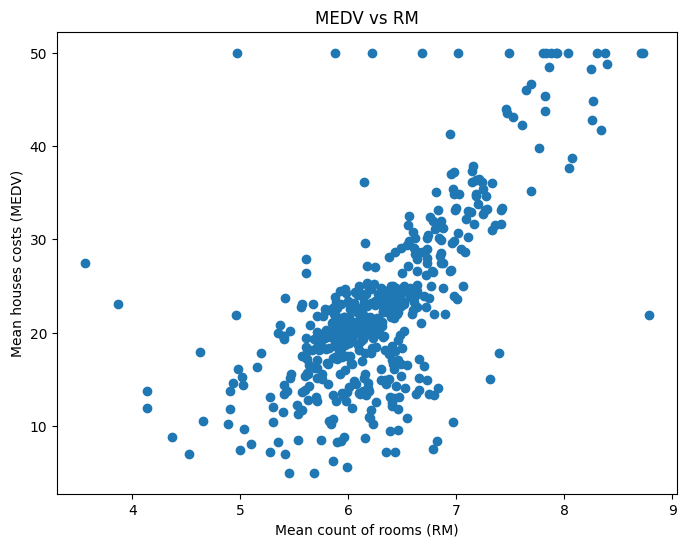

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df['rm'], df['medv'])
plt.xlabel('Mean count of rooms (RM)')
plt.ylabel('Mean houses costs (MEDV)')
plt.title('MEDV vs RM')
plt.show()

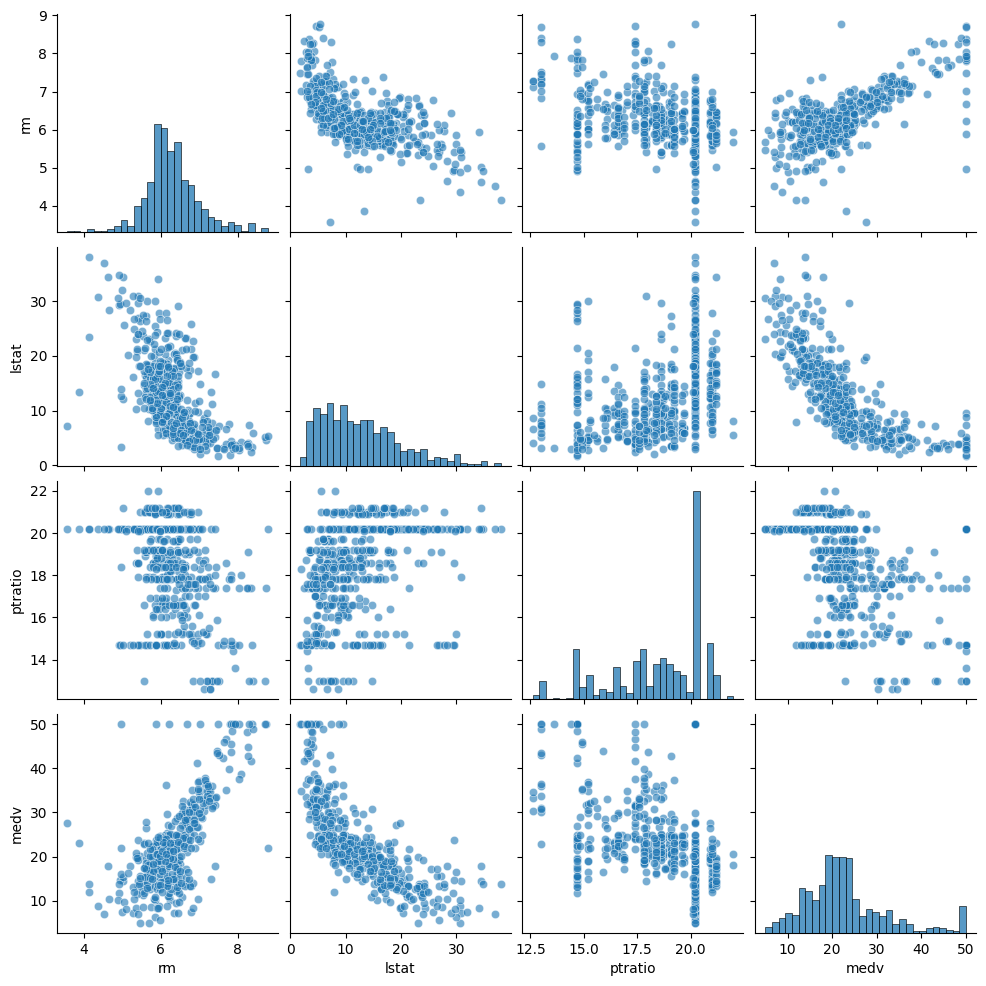

In [18]:
cols_corr = ['rm', 'lstat', 'ptratio', 'medv']
sns.pairplot(df[cols_corr], plot_kws={'alpha': 0.6}, diag_kws={'bins': 30})

### Выводы: с увеличением комнат в доме увеличивается средняя стоимость дома. С увеличением процента людей с низким уровнем жизни рядом с домом стоимость уменьшается. 
### По парным графикам наилучшее распределение, близкое к нормальному, у стобцов со средней стоимостью и средним количеством комнат.
### Прослеживается линейная зависимость, следовательно, можно применить линейную регрессию, в качестве выходных данных взять среднюю стоимость домов, а в качестве входных - признаки RM, LSTAT.